# L03.1 Interactive plots with Plotly

In order for this lecture to be standalone, we will use the dataset by the [Gapminder foundation](https://www.gapminder.org/). This dataset is very rich and allows us to demonstrate a rich demonstration of Plotly's capabilities.

In [1]:
from gapminder import gapminder
df = gapminder

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
country      1704 non-null object
continent    1704 non-null object
year         1704 non-null int64
lifeExp      1704 non-null float64
pop          1704 non-null int64
gdpPercap    1704 non-null float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


In [3]:
df['country'].unique() # Display unique entries in row 'country'

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Australia', 'Austria', 'Bahrain', 'Bangladesh', 'Belgium',
       'Benin', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Ethiopia',
       'Finland', 'France', 'Gabon', 'Gambia', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Haiti',
       'Honduras', 'Hong Kong, China', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kenya', 'Korea, Dem. Rep.',
       'Korea, Rep.', 'Kuwait', 'Leba

In [4]:
df.head(10) # display first 10 entries

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
5,Afghanistan,Asia,1977,38.438,14880372,786.113360
6,Afghanistan,Asia,1982,39.854,12881816,978.011439
7,Afghanistan,Asia,1987,40.822,13867957,852.395945
8,Afghanistan,Asia,1992,41.674,16317921,649.341395
9,Afghanistan,Asia,1997,41.763,22227415,635.341351


Looking at the head of the dataframe tells us that we have information on life expectancies, population, and GDP for each country every 5 years. This should allow us to produce some interesting plots!

## Plotly

### Line charts

We already used line charts in the basic plotting example. Let's check out how life expectancy has been doing over the years in Europe.

In [13]:
is_europe = df['continent'] == "Europe"
europe = df[is_europe]
europe.head()

,country,continent,year,lifeExp,pop,gdpPercap
12,Albania,Europe,1952,55.23,1282697,1601.056136
13,Albania,Europe,1957,59.28,1476505,1942.284244
14,Albania,Europe,1962,64.82,1728137,2312.888958
15,Albania,Europe,1967,66.22,1984060,2760.196931
16,Albania,Europe,1972,67.69,2263554,3313.422188


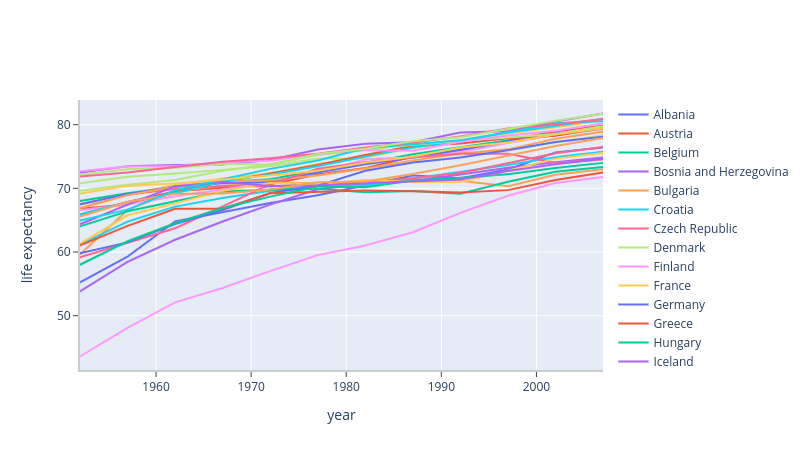

In [36]:
import plotly.graph_objs as go

countries = europe['country'].unique()

fig = go.Figure()

# Creating traces by looping over countries
for country in countries:
    is_country = europe['country'] == country
    trace = go.Scatter(x=europe[is_country]['year'],
                    y=europe[is_country]['lifeExp'],
                    mode="lines",
                    name=country)
    fig.add_trace(trace)

fig.update_layout(xaxis=dict(
        title="year",
        linecolor='rgb(204, 204, 204)',
        linewidth=2,
        ticks='outside',
    ),
    yaxis=dict(
        title="life expectancy",
        linecolor='rgb(204, 204, 204)',
        linewidth=2,
        ticks='outside',
    ),
    autosize=False,
)

fig.show()

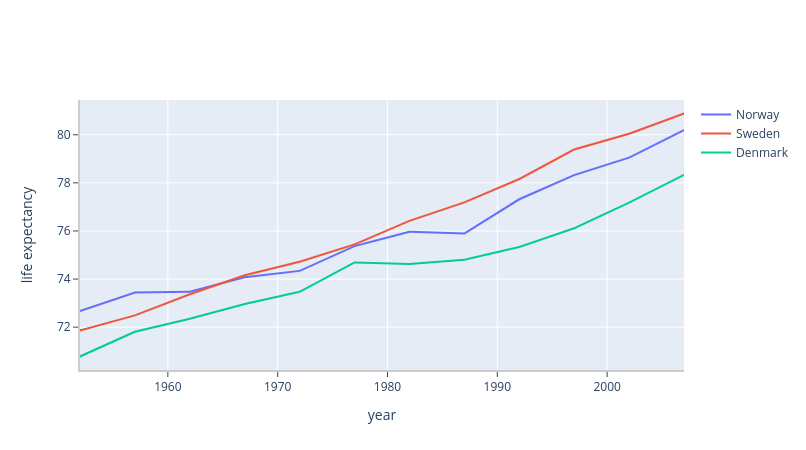

In [37]:
scandinavians = ['Norway', 'Sweden', 'Denmark']
is_scandinavia = europe['country'].isin(scandinavians)
scandinavia = europe[is_scandinavia]
 
fig = go.Figure()

# Creating traces by looping over countries
for country in scandinavians:
    is_country = europe['country'] == country
    trace = go.Scatter(x=europe[is_country]['year'],
                    y=europe[is_country]['lifeExp'],
                    mode="lines",
                    name=country)
    fig.add_trace(trace)

fig.update_layout(xaxis=dict(
        title="year",
        linecolor='rgb(204, 204, 204)',
        linewidth=2,
        ticks='outside',
    ),
    yaxis=dict(
        title="life expectancy",
        linecolor='rgb(204, 204, 204)',
        linewidth=2,
        ticks='outside',
    ),
    autosize=False,
)

fig.show()

### Bar charts

To illustrate bar charts we'll look at the GDP in Scandinavia over the years.

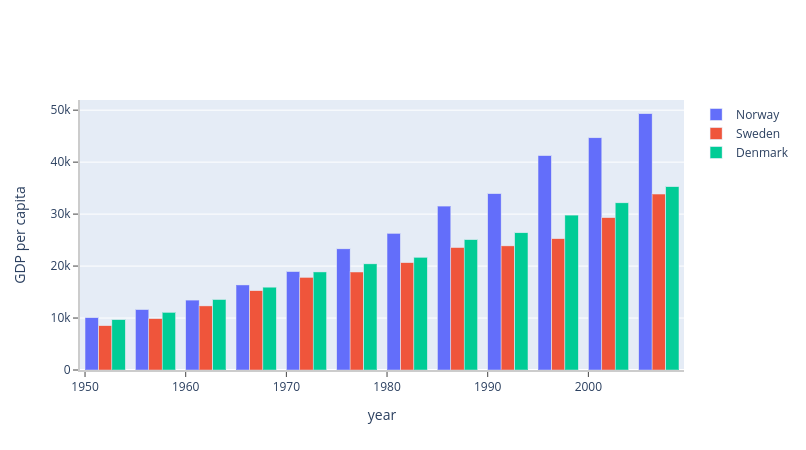

In [120]:
fig = go.Figure()

# Creating traces by looping over countries
for country in scandinavians:
    is_country = europe['country'] == country
    trace = go.Bar(x=europe[is_country]['year'],
                    y=europe[is_country]['gdpPercap'],
                    name=country)
    fig.add_trace(trace)

fig.update_layout(xaxis=dict(
        title="year",
        linecolor='rgb(204, 204, 204)',
        linewidth=2,
        ticks='outside',
    ),
    yaxis=dict(
        title="GDP per capita",
        linecolor='rgb(204, 204, 204)',
        linewidth=2,
        ticks='outside',
    ),
    autosize=False,
)

fig.show()

### Bubble plots

To illustrate scatter plots we'll look at life expectancy vs. income per country, where we'll scale the bubble by population size. This is the most well known graphic by Gapminder.

/home/alexandra/anaconda3/envs/data_analysis/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



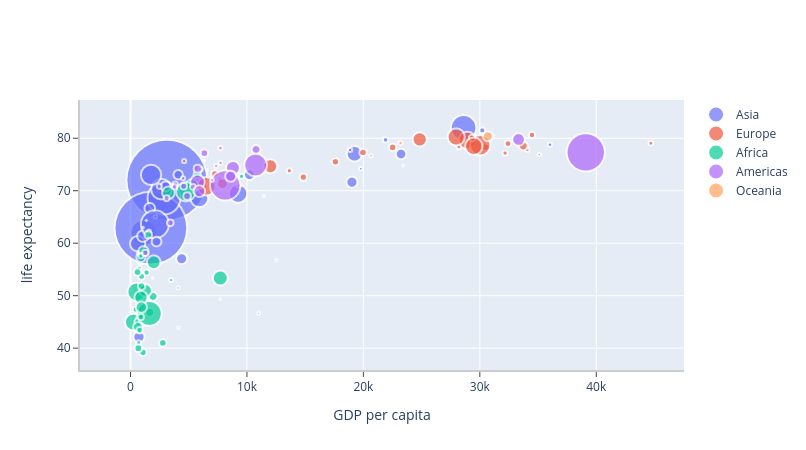

In [124]:
import numpy as np

fig = go.Figure()

is_year2002 = df['year'] == 2002
year2002 = df[is_year2002]

continents = year2002['continent'].unique()

# set hover text
hover_text = []
for index, row in year2002.iterrows():
    hover_text.append(('Country: {country}<br>'+
                      'Life Expectancy: {lifeExp}<br>'+
                      'GDP per capita: {gdp}<br>'+
                      'Population: {pop}<br>'+
                      'Year: {year}').format(country=row['country'],
                                            lifeExp=row['lifeExp'],
                                            gdp=row['gdpPercap'],
                                            pop=row['pop'],
                                            year=row['year']))
year2002['text'] = hover_text

# loop over continents
for continent in continents:
    is_continent = year2002['continent'] == continent
    pop = np.array(year2002[is_continent]['pop'].values, dtype=int)
    sizeref = 2.*max(pop)/(100)
    
    countries = year2002[is_continent]['country'].values

    trace = go.Scatter(x=year2002[is_continent]['gdpPercap'],
                    y=year2002[is_continent]['lifeExp'],
                    name=continent,
                    marker_size=pop,
                    text=year2002[is_continent]['text'])
    fig.add_trace(trace)
    fig.update_traces(mode='markers', marker=dict(sizemode='area',
                                                  sizeref=sizeref, line_width=2))

fig.update_layout(xaxis=dict(
        title="GDP per capita",
        linecolor='rgb(204, 204, 204)',
        linewidth=2,
        ticks='outside',
    ),
    yaxis=dict(
        title="life expectancy",
        linecolor='rgb(204, 204, 204)',
        linewidth=2,
        ticks='outside',
    ),
    autosize=False,
)

fig.show()

This is a nice plot, but it's only one year. How did this relationship evolve over the years? To do this we use the ```FigureWidget``` object that we can pass a ```Figure``` object.

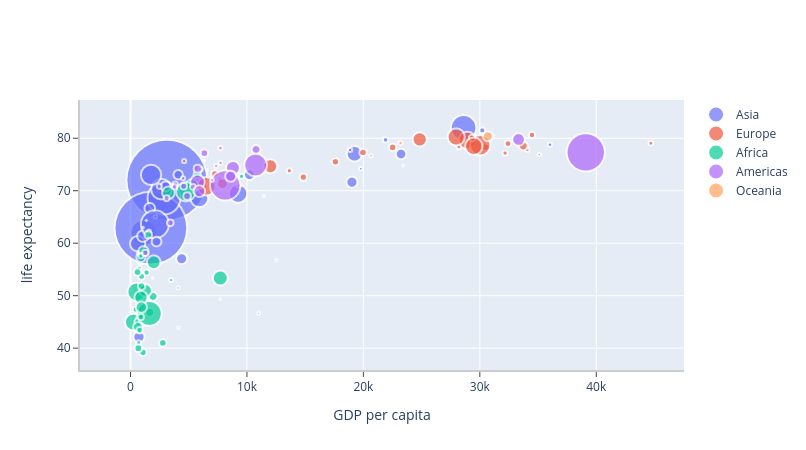

In [126]:
widget = go.FigureWidget(fig)
widget.show()

Adding interactivity to a widget requires some extra imports:

In [132]:
from ipywidgets import widgets
from IPython.display import display, clear_output, Image
from chart_studio.widgets import GraphWidget

<IPython.core.display.Javascript object>